In [34]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

In [35]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = '726e4bf5e6464a8594e0f3533dd7baec'
client_secret = 'bd9cc836ea53492eb506d7c30dae424d'
client_credentials_manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [36]:
first = pd.read_csv("first.csv", index_col=0)
second = pd.read_csv("second.csv", index_col=0)
third = pd.read_csv("third.csv", index_col=0)
fourth = pd.read_csv("fourth.csv", index_col=0)
fifth = pd.read_csv("fifth.csv", index_col=0)
sixth = pd.read_csv("sixth.csv", index_col=0)

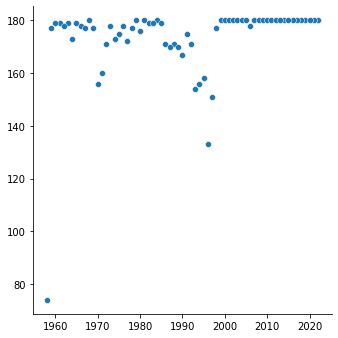

In [37]:
music=pd.concat([first, second, third, fourth, fifth, sixth])
music=music.dropna()
music=music[music['rank']<=15]
music["year"]=music["date"].apply(lambda x: datetime.date.fromisoformat(x).year)

s=music["year"].value_counts()
sns.relplot(x=s.index, y=s.values)

track_uri_list=pd.DataFrame()

track_uri_list['uri']=pd.Series(music['track_uri'].unique())

In [38]:
print(music)
print(track_uri_list)

                                             title  \
0                                 Poor Little Fool   
1                                         Patricia   
2                                    Splish Splash   
3                                Hard Headed Woman   
4                                             When   
...                                            ...   
77207                              I'm Good (Blue)   
77208  The Christmas Song (Merry Christmas To You)   
77209                                Feliz Navidad   
77210                                    As It Was   
77211                                  Die For You   

                                   artist  peakPos  lastPos  weeks  rank  \
0                            Ricky Nelson        1        0      1     1   
1           Perez Prado And His Orchestra        2        0      1     2   
2                             Bobby Darin        3        0      1     3   
3      Elvis Presley With The Jordanaires      

In [39]:
first=track_uri_list[:1000]
second=track_uri_list[1000:2000]
third=track_uri_list[2000:3000]
fourth=track_uri_list[3000:4000]
fifth=track_uri_list[4000:]


In [40]:
global total
total=0
def find_audio_features(uri):
    global total
    total=total+1
    print(total/1000)
    print(uri)
    audio_features=sp.audio_features(tracks=[uri])
    return audio_features[0]


In [41]:
first['features'] = first.apply(lambda uri: find_audio_features(uri['uri']), axis =1)

0.001
spotify:track:5ayybTSXNwcarDtxQKqvWX
0.002
spotify:track:2bwhOdCOLgQ8v6xStAqnju
0.003
spotify:track:40fD7ct05FvQHLdQTgJelG
0.004
spotify:track:32CVurlBxtEYQlDm3yzCLl
0.005
spotify:track:3HZJ9BLBpDya4p71VfXSWp
0.006
spotify:track:4nAJtcmiyoL0ARY5WZY9IN
0.007
spotify:track:3Lbxie6whOW4eMt4jtI32k
0.008
spotify:track:2Un1O9CChp4wyTmt422XwW
0.009
spotify:track:4ToAe9XCKjFGin2Qfswwis
0.01
spotify:track:3aPlQWU07jGgyHaBHVS5TS
0.011
spotify:track:70FdlOx7tulYnp2IkS6qQw
0.012
spotify:track:1fDKsQrMYOTGHYgyIxycmM
0.013
spotify:track:3bOkX6Yz6Pe4NByWzuJY6G
0.014
spotify:track:2UL1EwS6tfbNrdH805oyvi
0.015
spotify:track:006Ndmw2hHxvnLbJsBFnPx
0.016
spotify:track:3c7KT5CN8uYRaK3xThhdYt
0.017
spotify:track:2ZCkqAo0tzzCVOth7ityh5
0.018
spotify:track:2DAgYTzfPYqKJu0uItsNMd
0.019
spotify:track:398Q0gLfmsjJ5GFx9W2q5Y
0.02
spotify:track:2lmPUdIdzlFH64PWJrw6Zb
0.021
spotify:track:07ePHsQ0SopWrnCbNjNC2D
0.022
spotify:track:3ZyJfbh2Y9y15f45qY1pDJ
0.023
spotify:track:6NWKlkSFWP2Et2cEOpCbPY
0.024
spotify

0.194
spotify:track:4SqWKzw0CbA05TGszDgMlc
0.195
spotify:track:2V0U78Xx4KY843bJbuq586
0.196
spotify:track:21GQhKoEr9WvrRGUZxzAsv
0.197
spotify:track:2bgl6miORpyE4ql0gl7KHR
0.198
spotify:track:4nyF5lmSziBAt7ESAUjpbx
0.199
spotify:track:3Ek534aTTKexQoOp8kMuOa
0.2
spotify:track:1aTHBOr0V8XnbgHSRPyJtg
0.201
spotify:track:3hcn9Z8JGvq0h4vCe2Oa2R
0.202
spotify:track:6WHF5nnnZpkcCxkPTImpPD
0.203
spotify:track:4ydSzWwxqtNdP4VPfQe8bf
0.204
spotify:track:3LzTebHr2RM50iovDGzVOe
0.205
spotify:track:7jVBSPLSbL1jKVBDMXlRCx
0.206
spotify:track:18osa1s3PwYRkxM8ARgLnN
0.207
spotify:track:18ARvnm1orP4B2JMqIsVpt
0.208
spotify:track:2VOWdXGb8kR9WYj13oFT3P
0.209
spotify:track:1XunTmhOcj3xwh4b8P3isX
0.21
spotify:track:7KfwGraITe6aLd827Wq0bh
0.211
spotify:track:4w8QvjM1Nr344937eMBrgn
0.212
spotify:track:7DKNcWFgJiy4CZ377CZc1f
0.213
spotify:track:3eTYeAOll7LaINGjv9Fnvi
0.214
spotify:track:5TcEq6qNQJ7HXeTxwB3ZGB
0.215
spotify:track:4YCnTYbq3oL1Lqpyxg33CU
0.216
spotify:track:74vJVhDTZnhSHv1ingrM32
0.217
spotify:

0.387
spotify:track:3lWuagNhAzcqOikD5KnBku
0.388
spotify:track:4OLIr7pF1xnQAy4LOtfWru
0.389
spotify:track:0obIo2GEab6qqms6t3JaMY
0.39
spotify:track:3dVZsNXZWhBDUSjV2RkEWP
0.391
spotify:track:1FY6i2ypBOzsMHU2mWXMA9
0.392
spotify:track:1cPxnXUCio2zV6yE4pWZ25
0.393
spotify:track:4qKmW9c1Xif3F7rnE2gzHQ
0.394
spotify:track:6mUlvcJopD7M8Z5Dfu0d77
0.395
spotify:track:1OpLpcfXXLkd5mKdKd08Nt
0.396
spotify:track:6XEW0P64pYXfD06e4oLcWz
0.397
spotify:track:4a523vS6eCweMMW2t7vLCg
0.398
spotify:track:7iDgqnNiEjCLMcvErfT6zT
0.399
spotify:track:2brxFq9YHrI4v6RGrocn5X
0.4
spotify:track:0pUbz1pqMnljhIOq8TshkF
0.401
spotify:track:3DDV3CsZan0GcUVZAtvs7N
0.402
spotify:track:6jouZcdraQvsbh7SWkLEui
0.403
spotify:track:2gpLU5dhDI62Oo5I3kzJTZ
0.404
spotify:track:7FS541dJh3iQAEXEZoDhE6
0.405
spotify:track:1ZmWxSdZb8HNwOI7BogERU
0.406
spotify:track:7xt1KHm7ToHgfOaNhvONRR
0.407
spotify:track:3V82GURcde9M2zdVdyHSv4
0.408
spotify:track:04Wi1rcNpKRdIjSt7rtMM5
0.409
spotify:track:6xAKCAHwaAvw9rlwAv3lkD
0.41
spotify:t

0.581
spotify:track:7lCkX8C2en1tHHvryx1ywx
0.582
spotify:track:7jeOETwLUP84mPQzxlD5nh
0.583
spotify:track:31s2mbxcx4LX1EtZg1fUvA
0.584
spotify:track:1WN4uNclrDuczTO3bCr8s1
0.585
spotify:track:0GFnsrK9ywSAh4xFUeabhp
0.586
spotify:track:5G0yErsdIKfplod526gygr
0.587
spotify:track:7MKw6Ymv5XMwCfOvCLyl77
0.588
spotify:track:3KtLLTfMX9DrrahuU6hLfp
0.589
spotify:track:28ODIjaThE6hBOUAAl7y3W
0.59
spotify:track:49c763ZySFmD7XCCGZyEqf
0.591
spotify:track:5wcf2upIgIe7I9zkGYC7VF
0.592
spotify:track:5kJez8nvgq0HqhWy3UTQFx
0.593
spotify:track:2JwLfiU13mnYuiqcqriOLl
0.594
spotify:track:62PQXBFeAgS3iUseNRVPpF
0.595
spotify:track:0xeSDTXE4yc7AyF5pleSe5
0.596
spotify:track:1xW56U9vlxZ3hspLMvqUY7
0.597
spotify:track:3ygHAK1w3qP4wp83KXUiiu
0.598
spotify:track:22Z6ClJxSRovjPiswfCg3V
0.599
spotify:track:0ijOfCj9PHvhnrX6WXrQns
0.6
spotify:track:3h681qZSmhBOciAXLl1nsA
0.601
spotify:track:3jkcKJnxkPwx2aYSQ7D0Wp
0.602
spotify:track:5KES6ut3LAZxmgSOX0ijex
0.603
spotify:track:4IJcHdY7t0TcHnmjNtPkil
0.604
spotify:

0.775
spotify:track:7r0EUONfPUZ8SD1vu4ro27
0.776
spotify:track:7mnDpb8u9sqeJ9uu1x3H2I
0.777
spotify:track:1GJCJpKYfzRUsYnSRy4Mfz
0.778
spotify:track:6AxrqcdIE5lSjXxKUyBAU0
0.779
spotify:track:7CZiDzGVjUssMSOXrDNYHL
0.78
spotify:track:6sm028EoGuUbVnzC6pDaNx
0.781
spotify:track:4JxKHEtoBlaw6GlJPJYQo8
0.782
spotify:track:7foiOmd1Je7Z0D3TaZCDro
0.783
spotify:track:38KTIenSEnoGNGLUrYdFLV
0.784
spotify:track:18mQsjnzKoKIBsdQFd1Fvu
0.785
spotify:track:3Qg7WE98qRezh4Jq9fCKr8
0.786
spotify:track:4GNmvOYZW11lGzcZm0FKGY
0.787
spotify:track:70EUOJoFKWuzPCyHl6l6nL
0.788
spotify:track:3haZcHm3HydDVxm3je3Zmg
0.789
spotify:track:2WjW8DjQru6Ic4KvYDqLys
0.79
spotify:track:1Vzr9AOdHw65UHoK1Vuxls
0.791
spotify:track:6b6IMqP565TbtFFZg9iFf3
0.792
spotify:track:4PXJjX7PQGzCh4G5WR4Pli
0.793
spotify:track:4y9TLt6y1Lh12vLUCiSqOc
0.794
spotify:track:3TlIt0ReIxPsVZcOEivT5U
0.795
spotify:track:2dKxzd3AMmGpBvKhtsWzI8
0.796
spotify:track:6ZYvCY3zyajhHunwbDrCtx
0.797
spotify:track:2fGe1krTxovW7xsgiaHkrN
0.798
spotify

0.967
spotify:track:5QLOkT6xnj0J2d3vgiQ1uW
0.968
spotify:track:0wBaPbJ2qsbGqgnGbqBDgP
0.969
spotify:track:6utiXjyN4dWoMNEZa2skxn
0.97
spotify:track:60DmpUd1BnemzjASiUewnf
0.971
spotify:track:6PaoF0aLOd9XVaD4NUS1Ta
0.972
spotify:track:3koPNalAOcO8orv2MBvxen
0.973
spotify:track:6zGufyo5txRnBPsGm51Zc2
0.974
spotify:track:31vgSRfK5YOGSCAfj6zPAS
0.975
spotify:track:0t694qEXX27bGXLa1zVe8F
0.976
spotify:track:4IY7Fc1GuYtqXqIT46vrzK
0.977
spotify:track:6vR08FrdLqK0hiC2Y75s4O
0.978
spotify:track:35w6fQ0Wnuv7aIryRx7gTq
0.979
spotify:track:7lhPwKa37sjV9eqWouT9B4
0.98
spotify:track:5t9KYe0Fhd5cW6UYT4qP8f
0.981
spotify:track:4cix9zymmhisLuM56RDcB7
0.982
spotify:track:4Pu5jsCCU3CbOYGAInjLpS
0.983
spotify:track:4d6FHaOlHLo4sGpMXaexho
0.984
spotify:track:4a01ClusxuZiloOK5UgLUn
0.985
spotify:track:4cIt4ItMqeUBTgIr2MLYJg
0.986
spotify:track:2vDLWF0RVb7h8OlF2i8F94
0.987
spotify:track:3RB1zMyOLc5MvwUJeLN6Pv
0.988
spotify:track:4FmCUATNIarCQh72JYdvnm
0.989
spotify:track:1hJZFxflhsCvlfVIXh2vlQ
0.99
spotify:

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
first.to_csv('features1.csv')

In [43]:
second['features'] =second.apply(lambda uri: find_audio_features(uri['uri']), axis =1)

1.001
spotify:track:6y8o4V2R2dSt2ijgL8C72W
1.002
spotify:track:7K09lHx812oLYFMHSVEbp0
1.003
spotify:track:73XQBWHSVLL1939hb8cQTm
1.004
spotify:track:3RnsnfrquBAy6kIejQzc2C
1.005
spotify:track:6cQdZhnwKIeLud5qTD7BuQ
1.006
spotify:track:602FffJEffSJnWC8eHDIwv
1.007
spotify:track:3UyZnkRnMKHKxsLwcGast6
1.008
spotify:track:4WVDaesMXyHKO8jyr9w6tE
1.009
spotify:track:5BFWQXNGPYadZxNKxY1UfU
1.01
spotify:track:6QeBPf8oEpIU55p1LqiUJv
1.011
spotify:track:6pT33ADvrAnXzNUFvlrRdQ
1.012
spotify:track:4KUGhh0lsJ8GxQJ1Um8UrB
1.013
spotify:track:6Sfz7OhN8Hh9plicJoIvDw
1.014
spotify:track:6WIh0P8aupqSHeqUULThF0
1.015
spotify:track:3qCHUm73I3o5F1mDEfibzo
1.016
spotify:track:0WgbA5tqYfYoWB9eMFMVom
1.017
spotify:track:4xbEZAkHlMF66O11IRHTzB
1.018
spotify:track:6NF8MZ2trxckVBr82pyyPt
1.019
spotify:track:40BvPdq2rwYIoioUgjKHoK
1.02
spotify:track:5Y9St7Txe6OT7MgXknJwDr
1.021
spotify:track:2wvr1ITeMHg51JQXT0gltU
1.022
spotify:track:1JO1xLtVc8mWhIoE3YaCL0
1.023
spotify:track:1mFrjW8e8fuAOowlU3Q3Dr
1.024
spotify

1.193
spotify:track:3lN8PP6R2IxbLP05QpYXng
1.194
spotify:track:6oavqtFYgu0Zdpgesza6f4
1.195
spotify:track:5iRnkIAcHpbAlygyHwPSzG
1.196
spotify:track:2qCIeXERk1vrCZDafVnJEB
1.197
spotify:track:2wWdwNwfYiI7bSCGYtq0Un
1.198
spotify:track:2sZIclzhHlH8tzf7wry9hK
1.199
spotify:track:3lrjV9Albm8n8mIiMssYV1
1.2
spotify:track:4fnvjQXs8y18X8br917ohs
1.201
spotify:track:4Obsf07AjqKF26yM7aMfiX
1.202
spotify:track:3evKZi4dI9Nw7Hit26XFN9
1.203
spotify:track:4sTUkIe8cha0RCcTKvfc2J
1.204
spotify:track:51sulFzBlSrbU1G2IAbfgV
1.205
spotify:track:0aym2LBJBk9DAYuHHutrIl
1.206
spotify:track:1wVBq2SkE1AOKoaOxUVvDC
1.207
spotify:track:2nuMRtlTTp6hwPOsRsBu7n
1.208
spotify:track:4hFijVSyGeulZaLRJSGU5G
1.209
spotify:track:7r3Hwig1mvtlVq0ZbJ09Wb
1.21
spotify:track:55gWB0E5fwsIVfdGfrydoi
1.211
spotify:track:3NfxSdJnVdon1axzloJgba
1.212
spotify:track:5qA1ZrjjVLh1cL9GZOFdNm
1.213
spotify:track:3UDmHZcBTQp8Iu8droNtUl
1.214
spotify:track:7384ZImepcCLSwbxmX1D2T
1.215
spotify:track:1j60XO9cZ0MQSZ3qo6Ts9S
1.216
spotify:

1.385
spotify:track:6QhXQOpyYvbpdbyjgAqKdY
1.386
spotify:track:1hzRlAoXbslnQNqfSyAbKk
1.387
spotify:track:6TtWuzlHNTvtnpO0pI83MU
1.388
spotify:track:2gImbBWvXQWQ9ZDSQUWvNI
1.389
spotify:track:5F6XsffCcDXwJmJXiuPRle
1.39
spotify:track:1W24W6jQegnNh0x5DfBBPT
1.391
spotify:track:14vDlv40PzpXKBo6qmht6M
1.392
spotify:track:1FK3v638FHQcDJydhZdmtW
1.393
spotify:track:1CAO7hiNOxJRPW4nFv2aRO
1.394
spotify:track:45oZ12ruy9nRzmLwxiRd0s
1.395
spotify:track:1d3nxjsN3bBl4bP2UPuVl8
1.396
spotify:track:1d9hUvkv64Wmdu671Dydpc
1.397
spotify:track:0YgoNapnyIXuruBrzvoCSu
1.398
spotify:track:7qBjm1X2zPcCZ3vpSMj7YO
1.399
spotify:track:0SolModrdnbWok9RG9JlEK
1.4
spotify:track:2ZssT3XEX1cObqahy9YrQM
1.401
spotify:track:50q2aUjWoTn6CJIfSPRJQA
1.402
spotify:track:58uiNKZ1w4B89gHRfRLeJJ
1.403
spotify:track:7wWw7hBmErNg9u5w6Xx0vy
1.404
spotify:track:2eF8pWbiivYsYRpbntYsnc
1.405
spotify:track:7AA8axgnW6Nc9j5d5jPbig
1.406
spotify:track:5OXATqrGVPG49BjEIY6yyM
1.407
spotify:track:4ZEEcEMGjkWOfZNBcIB9yE
1.408
spotify:

1.579
spotify:track:0YveezON7jpiaHA8fnUHxN
1.58
spotify:track:3aVNV6pawEERvfdurW66ZT
1.581
spotify:track:36gobS3Dj2NKf48D62ZPSO
1.582
spotify:track:3QcuZo6WLcFkqqLmDs0d95
1.583
spotify:track:0ZhwlFI7I69yaXphO7t5R8
1.584
spotify:track:25Cv6pteVL6Wm4GIvPCFnO
1.585
spotify:track:0cFlXjTxFdMGGPfLVpt3Wv
1.586
spotify:track:55d46tOy9MQSrU482RtCBh
1.587
spotify:track:6S3JlDAGk3uu3NtZbPnuhS
1.588
spotify:track:5X3XrHlCFVGqNKpGp85xVC
1.589
spotify:track:57KfogSy3eKuk5JHLKwCJv
1.59
spotify:track:4hLk7Bjz1XJWNDiqovvgBW
1.591
spotify:track:17rMZ3L3ovX8raoaqA8ncX
1.592
spotify:track:5y8d8RHvxb0KiTa9Nq0xWp
1.593
spotify:track:17KFO56mkVEKR0v8qOPlkU
1.594
spotify:track:6HH6fmHF2YssfVkRmzcjf0
1.595
spotify:track:4hq0S6wznq7SHDyMOFXL9i
1.596
spotify:track:17MRUI1nql2E1GJEltjoyx
1.597
spotify:track:08L6jFH2p1NfDXX4suPvp2
1.598
spotify:track:4Ev3gucC4JAUbHJrHpY70w
1.599
spotify:track:0VdcSHXCPRfQQZYQPXSlZ9
1.6
spotify:track:3M8FzayQWtkvOhqMn2V4T2
1.601
spotify:track:2OyaNAq8BcGstyzueloqpE
1.602
spotify:t

1.773
spotify:track:0E4HRDc8ReRr7Fy59eW2bX
1.774
spotify:track:1vZTgn4JXWMahR8r99ug5H
1.775
spotify:track:5csdrJ0JtFn0qvwlvSh2EI
1.776
spotify:track:7uPmQttafLiJyju14JREY4
1.777
spotify:track:3iX0BMs9dX9CsgrHhiB173
1.778
spotify:track:1VREN3iKxfXrN6koXcXWPM
1.779
spotify:track:3K0SJUQNbOkUprTFcwwAKN
1.78
spotify:track:0uPIwcT6OdJ5BAJdYkxVp9
1.781
spotify:track:4rCzjErgNGgyFCMIKWlBcI
1.782
spotify:track:57yGqjGKJUIzgKWdIZo9aR
1.783
spotify:track:7pGMRy91RcQT9oHdPgYz3A
1.784
spotify:track:16ShgoIW9TtfzUFHOJJIvC
1.785
spotify:track:3m8lTUL5GxGUNSaycI77ND
1.786
spotify:track:2ZMVTfvCziy8qzSMgpD8Cz
1.787
spotify:track:3cf5jnygf67JWEBBCbsg0F
1.788
spotify:track:3PRCjIzUylrQWUyX1NbYFr
1.789
spotify:track:6Ac4NVYYl2U73QiTt11ZKd
1.79
spotify:track:5Wj1rJnCLpMHdLaxsFtJLs
1.791
spotify:track:59BFjKWVka67Wee48TmtjA
1.792
spotify:track:7GVUmCP00eSsqc4tzj1sDD
1.793
spotify:track:50wtPW7qTqRCi78OxVn2ep
1.794
spotify:track:0bYwN4LqZYLfs9ZEHPXjBC
1.795
spotify:track:7GqOrtlqGjt5kFlPK63ErE
1.796
spotify

1.965
spotify:track:1g2nJvSNGFj145mRiT6usx
1.966
spotify:track:4f5khGfquhi5YDNd4bRusS
1.967
spotify:track:5ABrBYbzepxzcW9pLIWw1j
1.968
spotify:track:3D0fUBloGwPcLGLyheGWXu
1.969
spotify:track:5uH47LeHJFojQl0nyL5lJL
1.97
spotify:track:3MOS4dRmZAIOpz3Vm817TO
1.971
spotify:track:6DRjlgLTQPZ2dQIRIs7b0U
1.972
spotify:track:7L24ueXfFCegIfpxmRLbmM
1.973
spotify:track:3sGOzhLEKanogNnnNJQiDv
1.974
spotify:track:6HH1rzLOFz4GdtLDRpqKdA
1.975
spotify:track:2u3UJ9KyduTnbi9yUVGYfW
1.976
spotify:track:5lQKRR3MdJLtAwNBiT8Cq0
1.977
spotify:track:5MjwNUe4SSzAzsHoBjlPOm
1.978
spotify:track:5dFvprlP5JS7gxeaMhMOWS
1.979
spotify:track:0PDCewmZCp0P5s00bptcdd
1.98
spotify:track:7KdcZQ3GJeGdserhK61kfv
1.981
spotify:track:2Ede3F4IK319I9ZDpXmv8K
1.982
spotify:track:7Bz8yww6UMbTgTVLG6zbI4
1.983
spotify:track:7x7eiPhnwODlzKrm4fupzW
1.984
spotify:track:5iqDl3manaRsASrEauSRPw
1.985
spotify:track:4dTeOAnnY4bLh4MeyNz6rK
1.986
spotify:track:4Wr14AISsCuBGdkA6rids4
1.987
spotify:track:1qiQduM84A0VeH8Y2uAbqi
1.988
spotify

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
second.to_csv('features2.csv')

In [45]:
third['features'] = third.apply(lambda uri: find_audio_features(uri['uri']), axis =1)

2.001
spotify:track:3PkGlPiPrehqbgCXJhxvwl
2.002
spotify:track:3AdX0KdVoMBqe82b19rWAU
2.003
spotify:track:5cAGsX0EzCqKuQr7nui6T7
2.004
spotify:track:1QoPtpJPMP0Zx8oxd0eDip
2.005
spotify:track:5W5FVsgGCe3T9nIMkiXqNo
2.006
spotify:track:714hERk9U1W8FMYkoC83CO
2.007
spotify:track:3rwzr0FvLhutQazlDqpOai
2.008
spotify:track:6Qb7gtV6Q4MnUjSbkFcopl
2.009
spotify:track:5x9xxVr7nJ9xMfDIW02Nv3
2.01
spotify:track:28WMPttAOsyV90WNiMXESa
2.011
spotify:track:777NOXupZkFdg8zlPMoVqc
2.012
spotify:track:1i5oEx2vFczQ2sCY3c6Kn5
2.013
spotify:track:0AQqrtK1pULuwZUXhwaaDz
2.014
spotify:track:1hQFF33xi8ruavZNyovtUN
2.015
spotify:track:2cWHN0WK52RGAWHgaDamUA
2.016
spotify:track:74DrA5fFoGSy4xgkZarZtP
2.017
spotify:track:0qgsctXeEVnUwgGESn3vW4
2.018
spotify:track:0bqZnsPz4klg5TuWGcKb34
2.019
spotify:track:2CeoxR14ZbXZ1FVYYV6wkm
2.02
spotify:track:00HnYt4dGTSZJIxywDcs7P
2.021
spotify:track:6OWlPonGJzHhBtoNef1y0u
2.022
spotify:track:1tMyqN7bNCokdg7jWgKPc8
2.023
spotify:track:064SVQsmWl5EF0zahmzkQk
2.024
spotify

2.193
spotify:track:1eeySrWP5X7hsbfyc3PPge
2.194
spotify:track:28H3wOEKsaEa8NBEYCLl4j
2.195
spotify:track:2eRYuzlSOBk3HlMsCSOLPJ
2.196
spotify:track:6H7nDglS6xWpRidbhMwI2L
2.197
spotify:track:478thMMvYGris8eJPcDRoq
2.198
spotify:track:0zb2kpEQMnqJPiLACKMiFM
2.199
spotify:track:0inlixqQpYphAQY7K38NAZ
2.2
spotify:track:0PsbWiVtix5FoTZ1s00mEl
2.201
spotify:track:7CfCUjAZFndcpAWLogl9J3
2.202
spotify:track:7ccI9cStQbQdystvc6TvxD
2.203
spotify:track:2SA7C7lBySq0m2fHlbPSZv
2.204
spotify:track:5ubvP9oKmxLUVq506fgLhk
2.205
spotify:track:53yBKCc5S7u8zzutqepkiT
2.206
spotify:track:5WdF8jm3hBNi1t9qlqdjsE
2.207
spotify:track:49MHCPzvMLXhRjDantBMVH
2.208
spotify:track:1nAexCn3dPoFSmE7h6P5S7
2.209
spotify:track:1TSehAcbBAcmZlSNMjmf6U
2.21
spotify:track:1SwyDb5qUcLjukFqSCRqxy
2.211
spotify:track:1Pd1h30mgU05QkWYhgFzwt
2.212
spotify:track:0KDc8l4VNTu6OkMYK9D7HC
2.213
spotify:track:0qemIQjSxcKyf42VPfZnfa
2.214
spotify:track:6io0LJIP9ntX35hTfaxwQG
2.215
spotify:track:08kvJTpcthAvvvW0BAcGHN
2.216
spotify:

2.387
spotify:track:0iINibMKtoS8duvexsqnm5
2.388
spotify:track:6SFeCisbYSqaQwL9hucoF2
2.389
spotify:track:6dw6BquK0Mv72p6HpusqKN
2.39
spotify:track:426i8hiYTwwlImNaluBb9C
2.391
spotify:track:6lOF261K1uiPZgKtureE90
2.392
spotify:track:2xpvmhp8j0UL9mCEqB1U0L
2.393
spotify:track:5IMtdHjJ1OtkxbGe4zfUxQ
2.394
spotify:track:3GcHkmz4horYIEPYvdB0xF
2.395
spotify:track:1bwBJsXuetTLgDM6JeqAqt
2.396
spotify:track:0m4jVVZrsv0bLkAr1uM6UG
2.397
spotify:track:0v0XYK0pLgsPiq5u4FKHaw
2.398
spotify:track:73vzOFFjJn4LUGUL9jhH4i
2.399
spotify:track:3pMeuv4OBarYqVR2bqCPVN
2.4
spotify:track:2SEGYVnWImKLUOkU3Qa8sX
2.401
spotify:track:7oOOI85fVQvVnK5ynNMdW7
2.402
spotify:track:0JkIre0YxNmKGMU5V7ZiDx
2.403
spotify:track:3Ug96zKa29P3vICEEcYajZ
2.404
spotify:track:2gliw3L0oa4w8LqaHploje
2.405
spotify:track:2YOwVfcUTRjNpcLny4UC4r
2.406
spotify:track:5nk6wxUSFUBxUKxjz0fKD6
2.407
spotify:track:3LrFVEZ9w4hVHS3sIRmzZk
2.408
spotify:track:35ItUJlMtjOQW3SSiTCrrw
2.409
spotify:track:0q1exbzIDRxqJ6VUKH3seg
2.41
spotify:t

2.579
spotify:track:4t374JpKYq4OGTUoJ4PVwm
2.58
spotify:track:3koCCeSaVUyrRo3N2gHrd8
2.581
spotify:track:5n1amEDwVKucAGMqePk9yN
2.582
spotify:track:618K2eozL0nM4nf0d8Q5r6
2.583
spotify:track:4mVKdnUMkuQlGQ7cRqcAPY
2.584
spotify:track:2npStoMbQxG1LcIeF4PZrj
2.585
spotify:track:04ijIUVdT4Qy1SBWFUPROY
2.586
spotify:track:3CSLUIrI2KPMulHR5bh17O
2.587
spotify:track:0JDxPxHeSkkBsWVMmcwMYi
2.588
spotify:track:41dDygR3r7e926oGUXfrLt
2.589
spotify:track:1ynmMEK1fkyiZ6Z6F3ThEt
2.59
spotify:track:6a899bXlCuViXW2Qs8Rdqo
2.591
spotify:track:11pJkEXM1lnmC9d3KLgH6H
2.592
spotify:track:1ewTd6py4ifeRxoFH0HXlu
2.593
spotify:track:4bRQodyVPba7f8mo3zyemR
2.594
spotify:track:3kTcvDQLW3zVbLyWyid6ua
2.595
spotify:track:3ZBzJbqwV2gQUAe4ofghOo
2.596
spotify:track:29KyVqHekckVGfxHn8QS7m
2.597
spotify:track:1ausxnZuFBzNn5sP3vaIe2
2.598
spotify:track:4Wd9pEtEnZNDjgiswGOpJb
2.599
spotify:track:3O4s2m47MFhnGqmpkjoKYk
2.6
spotify:track:2w4EpqGasrz9qdTwocx54t
2.601
spotify:track:2Cdvbe2G4hZsnhNMKyGrie
2.602
spotify:t

2.771
spotify:track:1ATq1R2bLeKXOSti9kzj5f
2.772
spotify:track:4wYqPn3Kg3vZrkVgW2oqAG
2.773
spotify:track:3JpaL6FMH9kjVWMA1mTmRl
2.774
spotify:track:4uqmzWlYa0eLKmbcHNgLej
2.775
spotify:track:2DEEMhTiUMvkiHFdXkrKfI
2.776
spotify:track:0GTK6TesV108Jj5D3MHsYb
2.777
spotify:track:533BzrB9TWzWH27T9Ra7Um
2.778
spotify:track:1Fg2cLf6qmKJDQrjdUWILt
2.779
spotify:track:4N8oxV3hvn8Efyo4yxp3LG
2.78
spotify:track:3pecdrUzTZjaqrw6iCLTvd
2.781
spotify:track:7fRvtXvJMpGfTLdF0M09a1
2.782
spotify:track:1mCsF9Tw4AkIZOjvZbZZdT
2.783
spotify:track:23l1kVpqMVREiwU1YAlcr4
2.784
spotify:track:2wSAWEYUHkt92X4SBAPqZE
2.785
spotify:track:709ffFK4o4MtG1NKoLvOma
2.786
spotify:track:7EAWB05mZwqsoj08jPRCCu
2.787
spotify:track:2WiTmNRMk6Rqtc1alR3IkR
2.788
spotify:track:2zFdsAIk9r2Mi7Lmm1w3sM
2.789
spotify:track:0meJMVapBf2xDoqJmO8fcB
2.79
spotify:track:5JKQMoGmXwDHCodn5pFVHB
2.791
spotify:track:7N3PAbqfTjSEU1edb2tY8j
2.792
spotify:track:6gmp4cBAgsQOqqZQECbH4u
2.793
spotify:track:6b9hm8mvZ2KH7Fl7LLA5ct
2.794
spotify

2.962
spotify:track:2yCAGizViD7HZXwNYxJToQ
2.963
spotify:track:2pdws07jfOrNgQrpPXKBI5
2.964
spotify:track:6Zs3F2lrr3L3kugrniFG5R
2.965
spotify:track:2Oz0u34csHei77XXIUNbMw
2.966
spotify:track:0PhU6i6Kei6x0CH3jocvA3
2.967
spotify:track:4LDPtuYOuAFtM6LBoRN0So
2.968
spotify:track:5PM96PMKMfD1lLX2lryUsG
2.969
spotify:track:2WfaOiMkCvy7F5fcp2zZ8L
2.97
spotify:track:4B2r9HXgUqRcPwUG3BYPlc
2.971
spotify:track:1lx8ddGT5wCD6W2xmLeRKG
2.972
spotify:track:0TBMx8wWJkwSEVSOJUn21e
2.973
spotify:track:0Dm43YLUlGdePpSbI1ct8h
2.974
spotify:track:06IsyJksK6vgJX66rU77Ij
2.975
spotify:track:1biP5gM7Le8S3E7GJEKgXC
2.976
spotify:track:6KstPI7s6qwhJaJyt93ykW
2.977
spotify:track:5lwQGZYF4BXOzFtXc5zk8q
2.978
spotify:track:0b8eSsBka9epA2J0wnPMax
2.979
spotify:track:6OnfBiiSc9RGKiBKKtZXgQ
2.98
spotify:track:02m2QLRIvbC3bPs6wGc52N
2.981
spotify:track:1l3fRzoUngJr6hSMIT1Hfq
2.982
spotify:track:1Jq7Z62Cs7PTJkJ1d53Xwo
2.983
spotify:track:78FHUZRbFDCG6VkRAQdFLm
2.984
spotify:track:4yEMyaB6PGBpQvac2yD9wZ
2.985
spotify

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
third.to_csv('features3.csv')

In [47]:
fourth['features'] = fourth.apply(lambda uri: find_audio_features(uri['uri']), axis =1)

3.001
spotify:track:2VN7uPrbryJ7nE2MXX3f9a
3.002
spotify:track:2OidbJv9f6ODOoTYlp5Lm5
3.003
spotify:track:5UU5FbITNm5OunvHQdsKME
3.004
spotify:track:5tdKaKLnC4SgtDZ6RlWeal
3.005
spotify:track:5BXj1QDRU77J1ngVavG1tI
3.006
spotify:track:4zpKunH4r2FFnETG9aEhfa
3.007
spotify:track:4Y5yjzs9FFw5qIgfZBd43I
3.008
spotify:track:3FdHgoJbH3DXNtGLh56pFu
3.009
spotify:track:5zSwmohdHeH2xmrWDFZUZZ
3.01
spotify:track:0sKfhhj6hYyJIXnTiZV9vf
3.011
spotify:track:6dahFmHrgncgVJjsI1ws7e
3.012
spotify:track:0HzjKCZmFhwcO2vnnHpj9q
3.013
spotify:track:22wWxHGHRH8gZXNDXRgSqY
3.014
spotify:track:4nKPgKXfFiPW7cNex5oDtt
3.015
spotify:track:3xdURkbZ8BrQM33X8Ko4Lg
3.016
spotify:track:4m3OS54KWywYhP7WD7z1cg
3.017
spotify:track:6zcPWQ6X2LlxLRBK4DGPqH
3.018
spotify:track:0lqfBvf1Gqmmt3l5Qeirlm
3.019
spotify:track:3G0ENKW9vzV0SuYKaWFflI
3.02
spotify:track:0DfG1ltJnZyq4Tx3ZLL7ZU
3.021
spotify:track:62LJFaYihsdVrrkgUOJC05
3.022
spotify:track:04EnF5C2HvYZfGu64Bng7I
3.023
spotify:track:00vYs0qZA40Z8AAaN7xmMO
3.024
spotify

3.194
spotify:track:1O7hDH3rrF8eyLxrpeoOfb
3.195
spotify:track:3sX3c6QUPSAiKf77RZRf5B
3.196
spotify:track:3h9RfFtjIw2Yb6Blogxnm4
3.197
spotify:track:1iF6F8M479F4ciQBhahZvV
3.198
spotify:track:74mogflQPJsYtZWZQ9mFmM
3.199
spotify:track:4uvjOKsp7mSjrDhWdkLPBY
3.2
spotify:track:2LbkpJUH052AvFcNIgjHTO
3.201
spotify:track:4CoSCPlKNrWli7E5kFtbcl
3.202
spotify:track:4zOpFaM93dyuI2BuNpmmS1
3.203
spotify:track:5JsIknb4lyIKQCytjv0Uw5
3.204
spotify:track:0nqbZ17t9v52SCemAm1QP0
3.205
spotify:track:5fy4vfEtv6lzqLx2Mt7stF
3.206
spotify:track:3EvpaRZkKWxsgDIO2zMH7g
3.207
spotify:track:4qgZs0RNjdzKAS22lP0QjY
3.208
spotify:track:6ihxXxSjslaVYd3oaAHCMT
3.209
spotify:track:0HEmnAUT8PHznIAAmVXqFJ
3.21
spotify:track:0IhUdJRoolbYeEMPL59XPm
3.211
spotify:track:6gM3uxq9TPkms83bTSlK10
3.212
spotify:track:2lj2TZc3z9jnuZPwqFLZXQ
3.213
spotify:track:4l2Edgdj4vla02GCh7YyAv
3.214
spotify:track:2fdfsGuqb6SBX5ocoBWHUd
3.215
spotify:track:1ukHtC2BBs51jmSGaxoEeL
3.216
spotify:track:3aAuIvgJGdp4wWd60riWfB
3.217
spotify:

3.388
spotify:track:43thLwzSasUUZEYjYPeJh3
3.389
spotify:track:3uUuGVFu1V7jTQL60S1r8z
3.39
spotify:track:3t4EJY6cTsb6FyP1EQzajK
3.391
spotify:track:4NhezoOLxvH7msw5Fil01i
3.392
spotify:track:6ez4yXpLini3DSbaLR10qZ
3.393
spotify:track:6lRkdG1HurVS72F9GoBeWJ
3.394
spotify:track:7DFawVSjI88xR9mjnWwURg
3.395
spotify:track:6ioBgySxoeQKALvAeLEmId
3.396
spotify:track:4jh9olf0OKCokpzxSyLeJx
3.397
spotify:track:3J0AoQhAufniMrznCRJASD
3.398
spotify:track:6d1IYeSfyqOTW61rPgocGD
3.399
spotify:track:4ke74jHjQAhNMWOs4XWyEr
3.4
spotify:track:5Qb7gx7gcxsYi3l7FHHm56
3.401
spotify:track:7gSQv1OHpkIoAdUiRLdmI6
3.402
spotify:track:7pfP8Z9M9KRUtzTLcnjem5
3.403
spotify:track:4LFwNJWoj74Yd71fIr1W8x
3.404
spotify:track:7pkWZL0kA26s754CwyK0SH
3.405
spotify:track:7yJYnyb2Hx4G1i12DVpead
3.406
spotify:track:1UHXwhhhyyikWEa3h79sNF
3.407
spotify:track:6jrp8qBMJO6vhAeYVAsdk9
3.408
spotify:track:60tCUGmI1Yhz5gLjXhplXx
3.409
spotify:track:4aYOQDyN2wTOlt2mRQ6zef
3.41
spotify:track:07sbyup2960cnUW73Uq9w9
3.411
spotify:t

3.58
spotify:track:1KT3ndndHOGXePgC4o0Jq9
3.581
spotify:track:6jL1SnyXcXiKOmw4M2RnmT
3.582
spotify:track:0otWaD7P1jqYsb0qSHNo6J
3.583
spotify:track:0n8sO6vHx3SkVEn2pjaqV9
3.584
spotify:track:5TS6P84uJYubgKr2QTU1fk
3.585
spotify:track:6bnKiqeXIQjOpZZSy0qTg7
3.586
spotify:track:46hYnq0jp7clQ4RedV6G5n
3.587
spotify:track:3MVm36ouM56jbP5rORxbVy
3.588
spotify:track:3IDsegNBHC4pjGCOMTQYlU
3.589
spotify:track:0lyNsWWnut97Jm8aDnn3Us
3.59
spotify:track:2qAqxEV45AAAN60GtFhvW7
3.591
spotify:track:6FfdQJ9HJcJAvsPVIyoGZ5
3.592
spotify:track:4wj8ppW6nJ5hYlgfeJNBn2
3.593
spotify:track:7mjTuZkE1XkJnco5bVsZCf
3.594
spotify:track:6QIWKCrhC1x6DPva7LigmU
3.595
spotify:track:0u16RbrSY7DWF3WAr0aaZ3
3.596
spotify:track:3WsbAGQt6HgTj9kg6f466M
3.597
spotify:track:1XF7umKqStpKnL2d2YZ53V
3.598
spotify:track:6oNvmplQGUkmAh441Teows
3.599
spotify:track:02mYS2yrqvRj5Yx8kexNWN
3.6
spotify:track:6pceknxOgA22HKs99yPEm1
3.601
spotify:track:1hFtJ5rV3aAm58ErijHdFO
3.602
spotify:track:3o8ls4KmiVYMymyiHuZtSi
3.603
spotify:t

3.773
spotify:track:21NA5Zggba7pyACm25h6k4
3.774
spotify:track:5hIljtQ1fRvDRc1aHdhwWK
3.775
spotify:track:0Y1Bi9loZbMijeHcycwH5r
3.776
spotify:track:1PJM5F9oC7AKcdYROTv8EX
3.777
spotify:track:0W2mz7mvaBaEsC4rmoRNPn
3.778
spotify:track:3xClOm84ur8ron2AZKQhTT
3.779
spotify:track:5oPRLER8bCQN3RFFVvLbTC
3.78
spotify:track:3TW48DvQ7ChwY1Yy1tkMaP
3.781
spotify:track:0t414ewhjcIiuPVF3QECz2
3.782
spotify:track:6HcQZfMrw3KwGyzrKw1Pjy
3.783
spotify:track:2rN2WzftSKZzDLFApWECWz
3.784
spotify:track:30qVCFYKBtAENjTIBA8FPZ
3.785
spotify:track:3xSu3S8v206qwhob9N2LGJ
3.786
spotify:track:3l9OCOG3Vt6c2lxeMyGSIY
3.787
spotify:track:70iDnqYvxCPl3mPd3ddxgD
3.788
spotify:track:1bkaWOpeKQkSQPiCFiHhxa
3.789
spotify:track:4voEoczU7Ijborps9XF1n3
3.79
spotify:track:4t1fWWJQs5V9YErfsrDslC
3.791
spotify:track:2CG9mGkKC6IQE5lEjDioEi
3.792
spotify:track:6eB35pgMXdfhz5Z0WjwF1O
3.793
spotify:track:6kWJvPfC4DgUpRsXKNa9z9
3.794
spotify:track:1aJnGme5ZRltYTp8FJ52eZ
3.795
spotify:track:7FsrQ9ioJZuTJ9S1ANyl0d
3.796
spotify

3.965
spotify:track:1iVdwLsbPsKnqUoZOWlEqv
3.966
spotify:track:0tNuJpBgtE65diL6Q8Q7fI
3.967
spotify:track:2MflYZf6aZzOxQWX0O7Brc
3.968
spotify:track:4eDCsyIHTSu3cQZ5wDIyP7
3.969
spotify:track:0gsl92EMIScPGV1AU35nuD
3.97
spotify:track:0t6DAi9KEiaWOtgTTXGhD2
3.971
spotify:track:3XorCFmcupSm5QS6hA9g4N
3.972
spotify:track:7KwZNVEaqikRSBSpyhXK2j
3.973
spotify:track:0lnxrQAd9ZxbhBBe7d8FO8
3.974
spotify:track:3jDdpx9PMlfMBS5tOBHFm9
3.975
spotify:track:2ck13qfgRZ1msyEJlDqzvk
3.976
spotify:track:4YrYuylaABLjyyl2Bw5tkG
3.977
spotify:track:1nP6feYWJVpbO41aezFtm2
3.978
spotify:track:3kVIFDE3G89I2RPVkiRaRj
3.979
spotify:track:21jEuMn2lf37715rwjow2M
3.98
spotify:track:1yTQ39my3MoNROlFw3RDNy
3.981
spotify:track:13XNjh0UY5LBsICcoHUdxl
3.982
spotify:track:503sFkc8Y2eyGnM6cu8kHm
3.983
spotify:track:3i6qNxyVgIdUZTTi5m25EM
3.984
spotify:track:4RZ24zRsVc1IBbn0wwgdPg
3.985
spotify:track:0idCpkJ2pspfAILbanmERu
3.986
spotify:track:1nRwyxNsqCLeA17qR8Nfxx
3.987
spotify:track:4INDiWSKvqSKDEu7mh8HFz
3.988
spotify

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
fourth.to_csv('features4.csv')

In [49]:
fifth['features'] = fifth.apply(lambda uri: find_audio_features(uri['uri']), axis=1 )

4.001
spotify:track:5NaOWLOmVjcA3M5spRATN9
4.002
spotify:track:3ozomn4PrGEKEuusxX2HpC
4.003
spotify:track:3TS25nchaYIPb2Y2fw6cbb
4.004
spotify:track:5YScXJKtefsgdskIy60N7A
4.005
spotify:track:5otUV0LUycAHXqGVz8bZY0
4.006
spotify:track:6PyLw3l6ndolBrTPQp3Ibm
4.007
spotify:track:7hfRrdFJgFKK3cJ4rmkecE
4.008
spotify:track:5MDQNJ7SZTytJwCbWKqJDL
4.009
spotify:track:6SluaPiV04KOaRTOIScoff
4.01
spotify:track:6ZIuoDs3i1KjKurJf9miSs
4.011
spotify:track:08bn759cPYICtUPoYx29P0
4.012
spotify:track:35EhXVNa2anqUwo3xl8yBU
4.013
spotify:track:013AWvizllIUEC2FOBzOnh
4.014
spotify:track:6FuJokk9FHx0E00SZ8ib8X
4.015
spotify:track:4oJEy4qDPwDk5ac26yEMeL
4.016
spotify:track:5L0KDoZklMgs9GPoonneEl
4.017
spotify:track:2cZuNzaAGNFozlZTxSDU1g
4.018
spotify:track:3Uvx1TO0Kg5HgGPk58lHXv
4.019
spotify:track:33LC84JgLvK2KuW43MfaNq
4.02
spotify:track:0weAUscowxeqDtpCgtbpgp
4.021
spotify:track:5kHgrRO3hMDPehtH9VhYQc
4.022
spotify:track:2IObe2lNB04HPbFfsSQ89f
4.023
spotify:track:1GwMQaZz6Au3QLDbjbMdme
4.024
spotify

4.192
spotify:track:3mNecsYFb6LQg7822DPXCP
4.193
spotify:track:3w8Mw9GHYepoTWOSdiyosj
4.194
spotify:track:4pmc2AxSEq6g7hPVlJCPyP
4.195
spotify:track:7DMigKJJYHSEAQrCfLZdr5
4.196
spotify:track:046MBhhgQJJghnbgZCkaAR
4.197
spotify:track:18CODOzJ5DWzWh6kAeKiSC
4.198
spotify:track:2WfhlEjoUII31H6imnQdvF
4.199
spotify:track:2BcOZ4vOeu2qZowIHrvTYy
4.2
spotify:track:6ZOBP3NvffbU4SZcrnt1k6
4.201
spotify:track:1NNDZc9BHaWe9JqIsPRlNV
4.202
spotify:track:7azC8toDthwJHHuw7m49K4
4.203
spotify:track:6znv7i4Wif5fLwI6OjKHZ4
4.204
spotify:track:1OvjOVieEsYqGiK1T3mUv9
4.205
spotify:track:7BgUcOjSOlKJXASLgJ6bx1
4.206
spotify:track:0eKyHwckh9vQb8ncZ2DXCs
4.207
spotify:track:7A0apkTSTvMbSI7yplcmlh
4.208
spotify:track:635PqgECfFbL0MNLogX7Yv
4.209
spotify:track:0WHOPmOuQKuu05k4g3UTvk
4.21
spotify:track:1jRzdY7oUBOhrylNtiMtBD
4.211
spotify:track:46n2EGFnPC3tzWCN1Aqe26
4.212
spotify:track:7rESdMWQMkNJffccsUr0Ii
4.213
spotify:track:1rj0XawWJNisX7SGYexowJ
4.214
spotify:track:1ak0S3NhwWrUgNlQhJ1412
4.215
spotify:

4.385
spotify:track:4vzYcDxBXAUPYDUna4BVeE
4.386
spotify:track:6pWzCKTrKrwbUPzY8RLCoP
4.387
spotify:track:2CZi8d774dBB0wiuWMIpr8
4.388
spotify:track:0RFgvrhkf9FiDRLA0BhzpZ
4.389
spotify:track:0l3GEbH3CviUytD6iX4wzg
4.39
spotify:track:3YE1DVMf46E45C3W9ybeWf
4.391
spotify:track:2D1hlMwWWXpkc3CZJ5U351
4.392
spotify:track:7iInDTMvYQrZnELy6nJ15s
4.393
spotify:track:5ojJNnX5ND2gMGojPd3NiO
4.394
spotify:track:2ajUxpHW8NJWV6LnbhaZTI
4.395
spotify:track:1LzNfuep1bnAUR9skqdHCK
4.396
spotify:track:1lKS7SZQ7r5vOChLwJurmm
4.397
spotify:track:0iFOG4Ki9aDmJUYUFHQlPG
4.398
spotify:track:31yydnZnSeCwkRPY7tlgQJ
4.399
spotify:track:3Gamc2D6VSlXpUcmhPUFYt
4.4
spotify:track:56m8Wv3qRBfwLuO08GtfHs
4.401
spotify:track:1PckUlxKqWQs3RlWXVBLw3
4.402
spotify:track:43LdgobPlcCc5g9Kmactvy
4.403
spotify:track:5uj2AfrbHQREGXVxhqhvyU
4.404
spotify:track:3cnBm1eo1j8imrSZQ3HXdj
4.405
spotify:track:2CtCwQhY0ZLvr8L2l8Bo6e
4.406
spotify:track:0FmCLEHfINGqwlyzvklNqy
4.407
spotify:track:3NLrRZoMF0Lx6zTlYqeIo4
4.408
spotify:

4.579
spotify:track:13xxBnXOuiBxVxJI458B0i
4.58
spotify:track:0JiY190vktuhSGN6aqJdrt
4.581
spotify:track:3lxFENvLW8nxXAbNfkZ7IJ
4.582
spotify:track:05Sgj1Hx03ZXc57gsV1kfX
4.583
spotify:track:2N5zMZX7YeL1tico8oQxa9
4.584
spotify:track:69uFUN6lJEbfESHfPKIwN2
4.585
spotify:track:2Fs18NaCDuluPG1DHGw1XG
4.586
spotify:track:2ICylmg7jCYdOWUFNa8VW7
4.587
spotify:track:4bPQs0PHn4xbipzdPfn6du
4.588
spotify:track:5gAwpwuchaCGnJLlBMGBzp
4.589
spotify:track:2OqYarizUUGzSSNHPrDEii
4.59
spotify:track:0O45fw2L5vsWpdsOdXwNAR
4.591
spotify:track:7jRoWfRlLnGYEIEn4t4kbq
4.592
spotify:track:6k8uthjEbttfWXcGaNTQGD
4.593
spotify:track:5FRIqUXfTazrtRmYEGO4G0
4.594
spotify:track:10aWGOqSDBqvNzJ9NeKDbK
4.595
spotify:track:663Karu2rvKLdnY0eo1n3M
4.596
spotify:track:0ADZ5dmXhlfzjMw6lefoPl
4.597
spotify:track:6DdPacpAdYkxV8MCzsjaXu
4.598
spotify:track:7g7M96UGiA7OR79H86gV4m
4.599
spotify:track:2JpUkUR0OsOlUUfm6iS8ic
4.6
spotify:track:5fVZC9GiM4e8vu99W0Xf6J
4.601
spotify:track:40LQiUUUKXVGyNs09lHVjW
4.602
spotify:t

4.773
spotify:track:13plQdOoWSSXPRUSZc5FuM
4.774
spotify:track:6Wx88Mv6b9ofjKMKkdwOJd
4.775
spotify:track:4NpDZPwSXmL0cCTaJuVrCw
4.776
spotify:track:6fvxos1qSHrIgOkKw4dhWS
4.777
spotify:track:4K5LLD1QqDCYfCfe7MjAsG
4.778
spotify:track:2oENJa1T33GJ0w8dC167G4
4.779
spotify:track:58FUwmyGUqkt53YPUcm7cJ
4.78
spotify:track:1NYjuVSkHaYK7QAIvs7lrF
4.781
spotify:track:3QLjDkgLh9AOEHlhQtDuhs
4.782
spotify:track:0TcJ7QWpggdSg8t0fHThHm
4.783
spotify:track:6klZDCEsQzMELAPyovvpUw
4.784
spotify:track:1qrpoAMXodY6895hGKoUpA
4.785
spotify:track:5VGlqQANWDKJFl0MBG3sg2
4.786
spotify:track:1Nme6K1PYAh7p7uygyuRdf
4.787
spotify:track:7kMfu3KUydmrFVGEAhjtyl
4.788
spotify:track:33RJ3P6wc0B0FIyDalhNTv
4.789
spotify:track:5Q0Nhxo0l2bP3pNjpGJwV1
4.79
spotify:track:0WtM2NBVQNNJLh6scP13H8
4.791
spotify:track:7LR85XLWw2yXqKBSI5brbG
4.792
spotify:track:0OPyDgTRuIdCJ9B4bYSths
4.793
spotify:track:3IcIIZMMS7UArJJPtEHXG8
4.794
spotify:track:3Bi9RWqWQeBYghhOeKPyep
4.795
spotify:track:67T6l4q3zVjC5nZZPXByU8
4.796
spotify

4.965
spotify:track:2o5mwv7hvas1jdUg14Nihv
4.966
spotify:track:6t6oULCRS6hnI7rm0h5gwl
4.967
spotify:track:4XNrMwGx1SqP01sqkGTDmo
4.968
spotify:track:0V1MeRzoASQXtFZU3qt71e
4.969
spotify:track:3dQFUrOmVMs27w6cwfJzOh
4.97
spotify:track:2iUmqdfGZcHIhS3b9E9EWq
4.971
spotify:track:03UrZgTINDqvnUMbbIMhql
4.972
spotify:track:4sK96UnGx3NjBaqvfTG2dm
4.973
spotify:track:3LEgGAl9zLcQWGTp7ptqtQ
4.974
spotify:track:0LohatbcUXRauoeMlR1jnS
4.975
spotify:track:6OkQHbZvH82TomRVylaWQt
4.976
spotify:track:1z9kQ14XBSN0r2v6fx4IdG
4.977
spotify:track:3w3y8KPTfNeOKPiqUTakBh
4.978
spotify:track:4kte3OcW800TPvOVgrLLj8
4.979
spotify:track:4bZd0nRuX8HyjeXAUBczvm
4.98
spotify:track:0W4Kpfp1w2xkY3PrV714B7
4.981
spotify:track:6QFCMUUq1T2Vf5sFUXcuQ7
4.982
spotify:track:6AtZLIzUINvExIUy4QhdjP
4.983
spotify:track:6CjtS2JZH9RkDz5UVInsa9
4.984
spotify:track:7F43PFsXdFmA2q5Rtv5FmC
4.985
spotify:track:2iJuuzV8P9Yz0VSurttIV5
4.986
spotify:track:1jF7IL57ayN4Ity3jQqGu0
4.987
spotify:track:4X5f3vT8MRuXF68pfjNte5
4.988
spotify

5.158
spotify:track:1LoriJC05IrHIDwj3q0KC1
5.159
spotify:track:7GgWAITsYJaRM3r50rfh5w
5.16
spotify:track:5kqIPrATaCc2LqxVWzQGbk
5.161
spotify:track:0l0CvurVUrr2w3Jj1hOVFc
5.162
spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P
5.163
spotify:track:4tCtwWceOPWzenK2HAIJSb
5.164
spotify:track:6RUhbFEhrvGISaQ8u2j2JN
5.165
spotify:track:275a9yzwGB6ncAW4SxY7q3
5.166
spotify:track:1zi7xx7UVEFkmKfv06H8x0
5.167
spotify:track:40XeGNGFchGYw7y0ue1GiG
5.168
spotify:track:61xaclre5j18KBTizgQlVQ
5.169
spotify:track:4pAl7FkDMNBsjykPXo91B3
5.17
spotify:track:0azC730Exh71aQlOt9Zj3y
5.171
spotify:track:6hmhG1b4LEyNuashVvuIAo
5.172
spotify:track:3S4px9f4lceWdKf0gWciFu
5.173
spotify:track:2RRRLgo66ueTHX0rn9G4Sn
5.174
spotify:track:2Z8WuEywRWYTKe1NybPQEW
5.175
spotify:track:7K5dzhGda2vRTaAWYI3hrb
5.176
spotify:track:6i0V12jOa3mr6uu4WYhUBr
5.177
spotify:track:0t7fVeEJxO2Xi4H2K5Svc9
5.178
spotify:track:1CwNogTShsnsn1C8UhRmYX
5.179
spotify:track:3KwwE4sgCzMaKWq6QBebmX
5.18
spotify:track:0BCy325UZyR9z0t0uxwn2N
5.181
spotify:

5.351
spotify:track:1dGr1c8CrMLDpV6mPbImSI
5.352
spotify:track:1000nHvUdawXuUHgBod4Wv
5.353
spotify:track:21jGcNKet2qwijlDFuPiPb
5.354
spotify:track:2aIB1CdRRG7YLBu9hNw9nR
5.355
spotify:track:4l0Mvzj72xxOpRrp6h8nHi
5.356
spotify:track:6KgBpzTuTRPebChN0VTyzV
5.357
spotify:track:2QpGZOhTCHHiKmpSO9FW4h
5.358
spotify:track:4cktbXiXOapiLBMprHFErI
5.359
spotify:track:2wrJq5XKLnmhRXHIAf9xBa
5.36
spotify:track:3eekarcy7kvN4yt5ZFzltW
5.361
spotify:track:696DnlkuDOXcMAnKlTgXXK
5.362
spotify:track:2XU0oxnq2qxCpomAAuJY8K
5.363
spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN
5.364
spotify:track:2FRnf9qhLbvw8fu4IBXx78
5.365
spotify:track:0oPdaY4dXtc3ZsaG17V972
5.366
spotify:track:0nbXyq5TXYPCO7pr3N8S4I
5.367
spotify:track:2uFaJJtFpPDc5Pa95XzTvg
5.368
spotify:track:5yY9lUy8nbvjM1Uyo1Uqoc
5.369
spotify:track:6IGGSnvsB2E7fkBrYPiYYw
5.37
spotify:track:3ZCTVFBt2Brf31RLEnCkWJ
5.371
spotify:track:7FIWs0pqAYbP91WWM0vlTQ
5.372
spotify:track:72DkM0i2AhcIrxjshLBWXM
5.373
spotify:track:5FVbvttjEvQ8r2BgUcJgNg
5.374
spotify

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
fifth.to_csv('features5.csv')

In [ ]:
newseries=clean_music_df.groupby('year')['tempo'].mean()
print(newseries)

sns.lineplot(data=newseries)
plt.gca().set_title("Average Tempo of Popular Songs Over Time")